<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python
</h2>
</div>

# Sommaire   

* [Chapitre 1 - Importation des librairies et chargement des fichiers](#chapter1)
     * [Importation des librairies](#section_1_1)
     * [Chargement des fichiers Excel](#section_1_2)
     * [Nettoyage des données](#section_1_3)
     * [Correlation des variables](#section_1_4)
     * [Test de Normalité Shapiro-Wilk](#section_1_5)
     * [Test de Kolmogorov-Smirnov](#section_1_6)
* [Chapitre 2 - Régression Linéaire](#chapter2)
     * [Vérification des Coeff de Détermination et effectuer les tests](#section_2_1)
     * [Normalité des Résidus, Homoscédacité, QQ-plot](#section_2_2)
     * [Implémentation des valeurs manquantes](#section_2_3)
* [Chapitre 3 - Clustering Kmeans](#chapter3)
     * [La Méthode du coude](#section_3_1)
     * [Evaluation du Modèle](#section_3_2)
     * [Calcul des scores](#section_3_3)
     * [Courbe ROC](#section_3_4)
* [Chapitre 4 - Régression Logisitque](#chapter4)
     * [GridsearchCv](#section_4_1)
     * [Evaluation du Modèle](#section_4_2)
     * [Calcul des scores](#section_4_3)
     * [Courbe ROC](#section_4_4)
* [Chapitre 5 - KNN](#chapter5)
     * [GridsearchCv](#section_5_1)
     * [Evaluation du Modèle](#section_5_2)
     * [Calcul des scores](#section_5_3)
     * [Courbe ROC](#section_5_4)
* [Chapitre 6 - Comparaison des modèles](#chapter6)

* [Chapitre 7 - Modèle Finale](#chapter7)

 

<style>
    .chapter-heading {
        background-color: transparent; /* No fill inside the border */
        padding: 0; /* No padding inside the border */
        color: #fff; /* White text color */
        margin: 0; /* Remove margin to align to the top */
        text-align: center; /* Center text */
        border: 1px solid RGB(0,150,250); /* Blue border */
        display: inline-block; /* Adjust width to content */
        box-sizing: border-box; /* Include padding and border in the element's total width and height */
    }
</style>

## <span class="chapter-heading">Chapitre 1 - Importation des librairies et chargement des fichiers</span> <a class="anchor" id="chapter1"></a>


<style>
    .section-heading {
        background-color: transparent; /* No fill inside the border */
        padding: 0; /* No padding inside the border */
        color: #fff; /* White text color */
        margin: 0; /* Remove margin to align to the top */
        text-align: center; /* Center text */
        border: 1px solid RGB(0,150,250); /* Blue border */
        display: inline-block; /* Adjust width to content */
        box-sizing: border-box; /* Include padding and border in the element's total width and height */
    }
</style>

## <span class="section-heading">Importation des librairies</span> <a class="anchor" id="section_1_1"></a>





In [2]:
import pandas as pd
import numpy as np 
import pylab
import pickle

# Bibliothèque Graphique

import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèque Apprentisage
from sklearn.model_selection import train_test_split,validation_curve,learning_curve,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier 


# Bibliothèque Stastistique
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model as sml
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

from scipy.stats import shapiro
from scipy.stats import levene
from scipy import stats
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster


import warnings


<style>
    .section-heading {
        background-color: transparent; /* No fill inside the border */
        padding: 0; /* No padding inside the border */
        color: #fff; /* White text color */
        margin: 0; /* Remove margin to align to the top */
        text-align: center; /* Center text */
        border: 1px solid RGB(0,150,250); /* Blue border */
        display: inline-block; /* Adjust width to content */
        box-sizing: border-box; /* Include padding and border in the element's total width and height */
    }
</style>

## <span class="section-heading">Chargement des fichiers Excel</span> <a class="anchor" id="section_1_2"></a>

In [3]:
# Importation des fichier
chemin = 'D:\\CODE\\Projet Openclassrooms\\Projet n_9\\excel\\'
billet = pd.read_csv(chemin + 'billets.csv', sep=';')

<style>
    .section-heading {
        background-color: transparent; /* No fill inside the border */
        padding: 0; /* No padding inside the border */
        color: #fff; /* White text color */
        margin: 0; /* Remove margin to align to the top */
        text-align: center; /* Center text */
        border: 1px solid RGB(0,150,250); /* Blue border */
        display: inline-block; /* Adjust width to content */
        box-sizing: border-box; /* Include padding and border in the element's total width and height */
    }
</style>

## <span class="section-heading">Nettoyage des données</span> <a class="anchor" id="section_1_3"></a>

In [4]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Nous disposons actuellement de six informations géométriques sur un billet :

 - length : la longueur du billet (en mm) ;
    
 - height_left : la hauteur du billet mesurée sur le côté gauche (en mm) ;
    
 - height_right : la hauteur du billet mesurée sur le côté droit (en mm) ;
    
 - margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
    
 - margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
    
 - diagonal : la diagonale du billet (en mm).

In [5]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(billet)

0 doublons


In [6]:
billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
# Statistiques de base pour les colonnes numériques
description = billet.describe()

# Nombre de valeurs uniques pour toutes les colonnes
nunique = billet.nunique()

# Afficher les résultats
print(description)
print("\nNombre de valeurs uniques par colonne :\n", nunique)


          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  

Nombre de valeurs uniques par colonne :
 is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
ma

In [8]:
# Encoder la variable is_genuine 
billet['is_genuine'].replace([False,True], [0,1], inplace=True)
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
billet_vrai = billet[billet["is_genuine"] == 1]
billet_faux = billet[billet["is_genuine"] == 0]

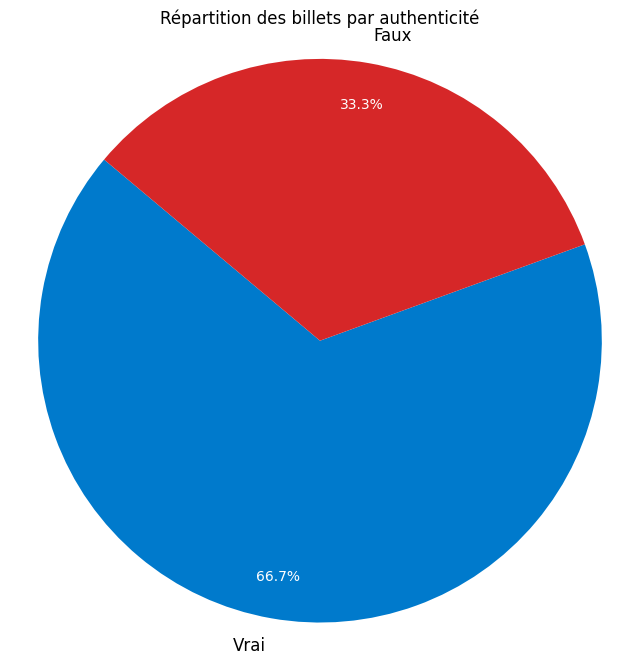

In [10]:
# Créer le diagramme circulaire pour voir la proportion de billets vrais et faux

billet_vrai_2 = billet[billet["is_genuine"] == 1].shape[0]
billet_faux_2 = billet[billet["is_genuine"] == 0].shape[0]


plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie([billet_vrai_2, billet_faux_2], labels=["Vrai", "Faux"], startangle=140,
                                   autopct='%1.1f%%', pctdistance=0.85, colors=['#007acc', '#d62728'])

for autotext in autotexts:
    autotext.set_color('white')
plt.setp(texts, size=12)
plt.title('Répartition des billets par authenticité')
plt.axis('equal')
plt.show()

In [11]:
billet_missing = billet[billet['margin_low'].isnull()]
billet_not_missing = billet[~billet['margin_low'].isnull()]

<style>
    .section-heading {
        background-color: transparent; /* No fill inside the border */
        padding: 0; /* No padding inside the border */
        color: #fff; /* White text color */
        margin: 0; /* Remove margin to align to the top */
        text-align: center; /* Center text */
        border: 1px solid RGB(0,150,250); /* Blue border */
        display: inline-block; /* Adjust width to content */
        box-sizing: border-box; /* Include padding and border in the element's total width and height */
    }
</style>

## <span class="section-heading">Correlation des variables</span> <a class="anchor" id="section_1_4"></a>

<Axes: >

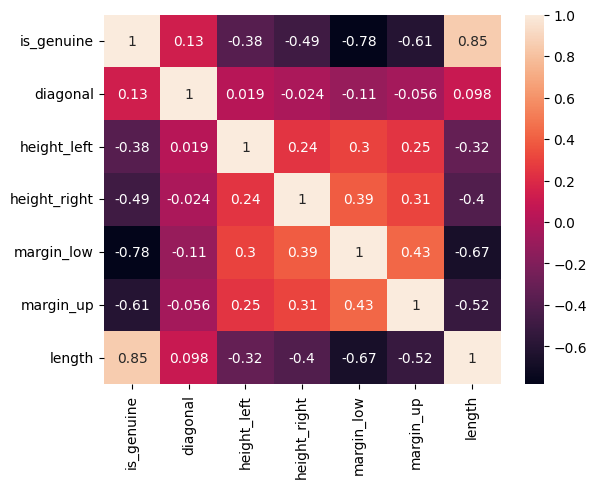

In [12]:
# heatmap de corrélations entre les différentes variables
sns.heatmap(billet.corr(), annot=True)

On peut voir que notre colonne margin_low est fortement anticorélée à lenght mais aussi à Is_genuine et diagonal.

En revanche, elle est corrélée à Height_left,Height_right,margin_up.

C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


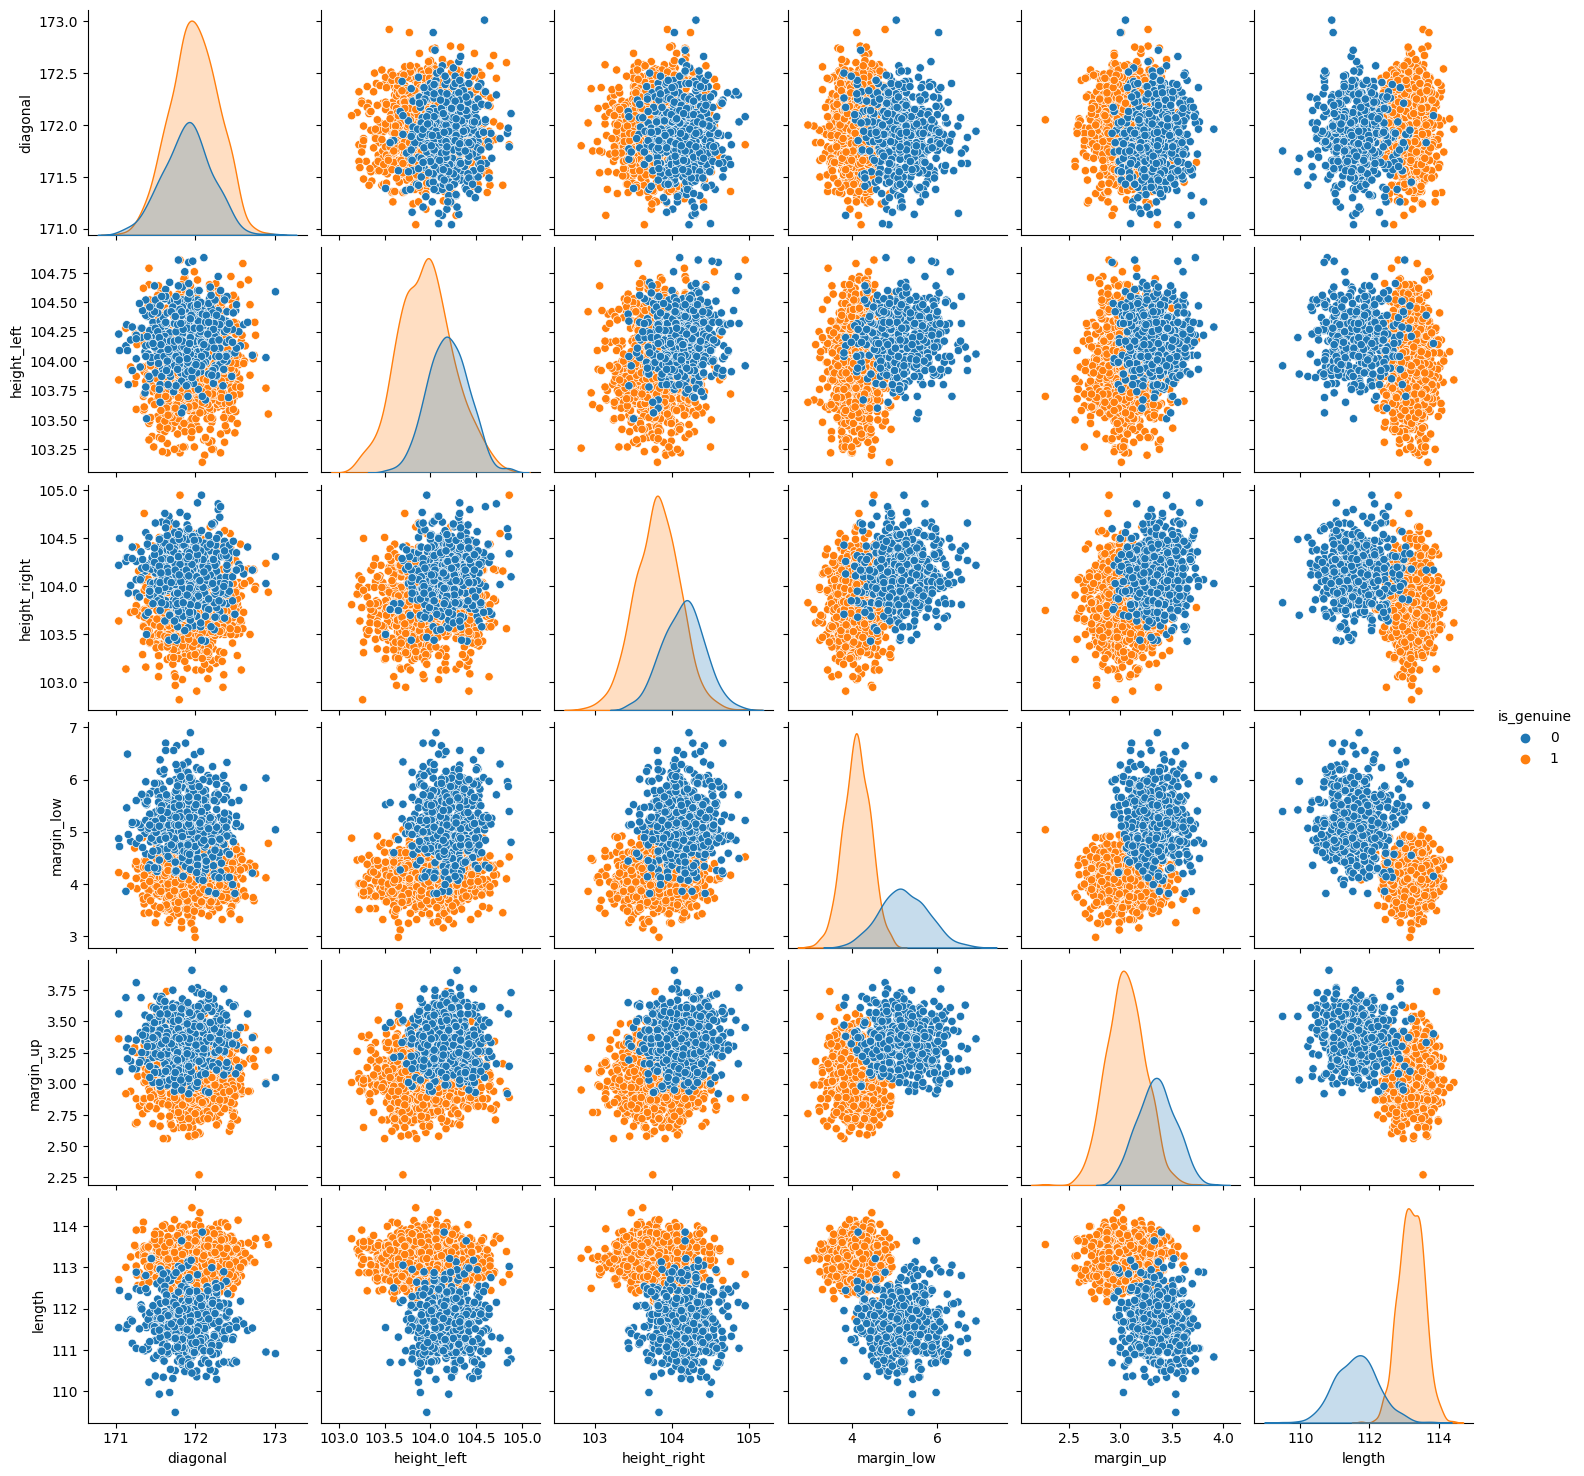

In [13]:
sns.pairplot(billet,hue='is_genuine')

In [14]:
# vérification des corrélations entre nos variables 
billet.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Test de Normalité Shapiro-Wilk</span> <a class="anchor" id="section_1_5"></a>

Le test de normalité Shapiro-Wilk permet de s'assurer que la distribution des variables est normale (gaussienne) ou non.
 
En adoptant un seuil de signification de 5% pour les tests de normalité, nous posons les hypothèses suivantes :

H0 (Hypothèse nulle) : La distribution de la variable est conforme à une distribution normale.

H1 (Hypothèse alternative) : La distribution de la variable s'écarte de la normalité

In [15]:
# Nous allons d'abord crée une listes de nos variables

billet.columns.values.tolist()

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [16]:
# Test de Shapiro-Wilk

alpha = 0.05

for i in billet.iloc[:,:]:
    stat, pvalue = stats.shapiro(billet[i])
    print(pvalue)
    if pvalue > alpha:
        print("Les données suivent une loi normale")
    else:
        print("Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale")

0.0
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
0.32343590259552
Les données suivent une loi normale
0.0509396530687809
Les données suivent une loi normale
0.9806053638458252
Les données suivent une loi normale
1.0
Les données suivent une loi normale
0.000810406228993088
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
7.863947037789753e-28
Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale


Les données Diagonal, height_left, height_right et margin_low suivent une loi normale en revanche les données  margin_up, length ne suivent pas une loi normale.

Lorsque les résidus ne suivent pas une distribution normale, cela peut indiquer que le modèle de régression n'est pas adéquat pour capturer toutes les relations linéaires entre les variables.

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Test de Kolmogorov-Smirnov</span> <a class="anchor" id="section_1_6"></a>

Le test de Kolmogorov-Smirnov est un test non paramétrique, plus général, qui peut tester l'adéquation à n'importe quelle distribution, pas seulement la normale.

In [17]:
liste_varariable= billet_not_missing.drop(columns=['margin_low','is_genuine'])
for var in liste_varariable :
    print(var,":",st.ks_2samp(billet[var],list(np.random.normal(np.mean(billet[var]), np.std(billet[var]), 1000))))
    
    if pvalue < alpha:
        print("Les données suivent une loi normale")
    else:
        print("Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale")

diagonal : KstestResult(statistic=0.03266666666666666, pvalue=0.5362923595705972, statistic_location=172.0, statistic_sign=1)
Les données suivent une loi normale
height_left : KstestResult(statistic=0.044333333333333336, pvalue=0.18510963664966354, statistic_location=104.06, statistic_sign=1)
Les données suivent une loi normale
height_right : KstestResult(statistic=0.025666666666666667, pvalue=0.8173110198251231, statistic_location=103.85, statistic_sign=1)
Les données suivent une loi normale
margin_up : KstestResult(statistic=0.035333333333333335, pvalue=0.43520617615283563, statistic_location=3.18, statistic_sign=1)
Les données suivent une loi normale
length : KstestResult(statistic=0.14133333333333334, pvalue=6.775857652685842e-11, statistic_location=112.81931427915072, statistic_sign=-1)
Les données suivent une loi normale


Le Test non paramétrique de Kolgomorov-smirnov  nous montre que nous avons une distribution normale

<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 2 - Régression linéaire</span> <a class="anchor" id="chapter2"></a>


Nous allons utiliser un modèle de régression linéaire multivariables pour traiter nos valeurs manquantes  
Pour cela, nous allons séparer le DataFrame en 2:  
* un dataframe avec seulement les valeurs manquantes 
* un dataframe sans les valeurs manquantes pour la régression linéaire 

Préparation du model de régression linéaire 

In [18]:
# Liste des colonnes prédictives
prédictives = ['length', 'height_left', 'height_right', 'margin_up', 'diagonal', 'is_genuine']
# La colonne à prédire
target = 'margin_low'  

# Préparer les features X et la target Y
x = billet_not_missing[prédictives]
y = billet_not_missing[target]

x = sm.add_constant(x)  # Ajoute une colonne constante pour l'interception

model = sm.OLS(y, x).fit()  # Ajuste le modèle

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          4.75e-299
Time:                        16:20:57   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8668      8.316      0.345   


On remarque que le R²( coefficient de détermination) est de 0.617 et que le R² ajusté est de 0.615

un R-squared de 0.617 signifie que 61.7% de la variable margin_low peut être expliquée par les variables indépendantes choisies.

Aussi, le P-valeur de margin_up et de is_genuine sont inférieurs à 0.05, donc significatives

On va donc maintenant retirer les variables non significatives.

In [19]:
# Liste des colonnes prédictives
prédictives = ['margin_up', 'is_genuine']
# La colonne à prédire
target = 'margin_low'  

# Préparer les features X et la target Y
x = billet_not_missing[prédictives]
y = billet_not_missing[target]

x = sm.add_constant(x)  # Ajoute une colonne constante pour l'interception

model = sm.OLS(y, x).fit()  # Ajuste le modèle

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.24e-304
Time:                        16:20:57   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9263      0.198     30.003      0.0

on remarque que 2 variables suffice pour la régréssion linéaire, pas besoin de forcement prendre toute les variables 

In [20]:
# On fractionne le dataset en 75/25 pour avoir plus de donnée d'entraitenement que de test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [21]:
model =LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Prédiction
y_pred=model.predict(X_test)
y_pred

array([5.29226376, 4.1305148 , 4.07381751, 4.1132591 , 4.06395712,
       4.1083289 , 5.23803157, 4.1329799 , 4.08860811, 4.1206544 ,
       4.1132591 , 5.18872959, 5.21338058, 4.14530539, 4.135445  ,
       4.02698063, 4.135445  , 4.09600341, 4.15763089, 4.08367791,
       4.08860811, 4.08121281, 5.28979866, 4.10339871, 4.17488659,
       5.20598528, 4.1379101 , 4.05163162, 4.1058638 , 5.24049667,
       5.30212416, 5.19119468, 5.26021747, 4.1379101 , 4.15763089,
       4.03930612, 4.135445  , 4.1132591 , 5.19612488, 4.1428403 ,
       4.23404897, 5.17886919, 4.1280497 , 4.16749129, 4.10339871,
       4.1157242 , 5.18133429, 5.23063627, 4.18967718, 5.20352018,
       5.21338058, 4.1132591 , 4.04916652, 5.17147389, 4.03437592,
       4.07628261, 4.15763089, 4.09600341, 5.149288  , 4.1379101 ,
       5.29226376, 4.1181893 , 4.1231195 , 4.15516579, 4.15270069,
       5.1172417 , 5.24542687, 4.1255846 , 4.1058638 , 4.08367791,
       4.1255846 , 5.27254296, 5.30705435, 4.08860811, 4.06888

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Vérification des Coeff de Détermination et effectuer les tests</span> <a class="anchor" id="section_2_1"></a>

In [24]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Score train :', train_score,'Score test  :', test_score )

Score train : 0.6220585290018623 Score test  : 0.5981200179483284


MAE (Mean Absolute Error) : est la moyenne de toutes les erreurs de prédictions absolues, où l'erreur de prédiction est la différence entre la valeur réelle et la valeur prédite.

In [25]:
# Utilisation du coefficient de détermination

MAE = mean_absolute_error(y_test,y_pred)

print('MAE =', mean_absolute_error(y_test,y_pred)) # Erreur quadratique moyenn

MAE = 0.3162275052008384


MSE (Mean Squared Error) : on peut l'interprêter comme la différence +/- au carré entre la valeur prédite et la valeur réelle

In [26]:
MSE = mean_squared_error(y_test,y_pred)

print('MSE =', mean_squared_error(y_test,y_pred)) # Erreur absolue moyenne

MSE = 0.16889645354776536


RMSE (Root Mean Squared Error): on peut l'interprêter comme la différence +/- moyenne prévue entre une valeur prédite et la valeur réelle. Il s'agit de l'écart type des résidus

In [27]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
                   
print('RMSE =',np.sqrt(mean_squared_error(y_test,y_pred))) # Racine carrée de l'erreur quadratique 

RMSE = 0.41097013705105795


R2 (R au carré) : plus la valeur se rapproche de 1 plus la valeur cible peut aboutir à des prédictions exactes.

In [28]:
#  le coeficient R² de notre régression linéaire 

R2 = r2_score(y_test, y_pred)
R2

0.5981200179483284

Le R² est à 59%, ce qui est bas mais reste intéressant. 

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Normalité des Résidus, Homoscédacité, QQ-plot</span> <a class="anchor" id="section_2_2"></a>

p-value du test de normalité : 0.10155541449785233


C:\Users\TOTO\AppData\Local\Temp\ipykernel_4956\1474586384.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = résiduals,shade = True)


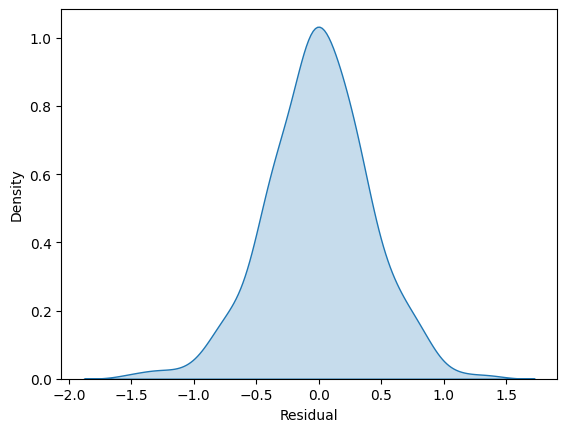

In [29]:
# Normalité des Résidus

résiduals= y_pred-y_test
sns.kdeplot(x = résiduals,shade = True)
plt.xlabel('Residual')

_, p_value = stats.shapiro(résiduals)
print(f"p-value du test de normalité : {p_value}")

Vue que mon p-value est 0.10155541449785233, ce qui est supérieur à 0.05, cela indique qu'il n'y a pas de raison de rejeter l'hypothèse de normalité des résidus.

d'après la p-value du test de Shapiro-Wilk et la forme de la distribution des résidus, on peut déduire que les résidus de notre modèle sont normalement distribués. 

Cela signifie que votre modèle répond bien à l'une des principales hypothèses de la régression linéaire

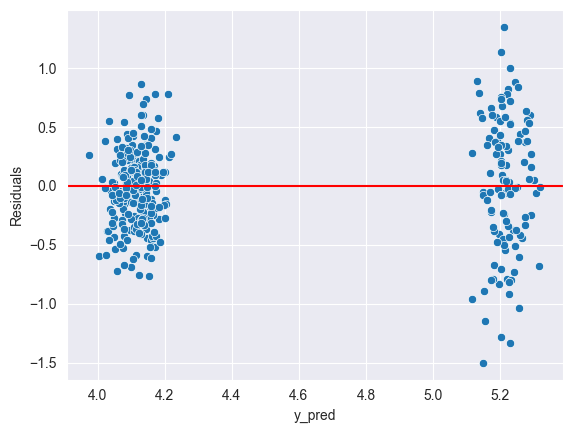

In [30]:
# homoscédasticité

sns.set_style('darkgrid')
sns.scatterplot(x= y_pred,y = résiduals)
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.axhline(y = 0,color = 'red')

In [31]:
# VIF(variance inflation factor)

vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.head()

,variable,VIF
0,const,332.717177
1,margin_up,1.581489
2,is_genuine,1.581489


VIF = 1, pas de corrélation entre la variable indépendante et les autres variables

VIF supérieur à 5 ou 10 indique une forte multicolinéarité entre cette variable indépendante et les autres

Ici, nous avons des valeurs qui sont 1, 

le nombre de condition est une façon de mesurer si les résultats de mon modèle de régression vont beaucoup changer pour de petites modifications dans vos données.

In [32]:
# Importation du numéro de condition() depuis la bibliothèque numpy.Linalg
from numpy.linalg import cond
cond(X_train)

64.5503638634228

Numéro de condition < 100 on dit qu'il n'y a pas de multicolinéarité

100 < Nombre de conjonction < 1000 est dit avoir une multicolinéarité modérée

numéro de condition > 1000 on dit qu'il est fortement multicolinéaire

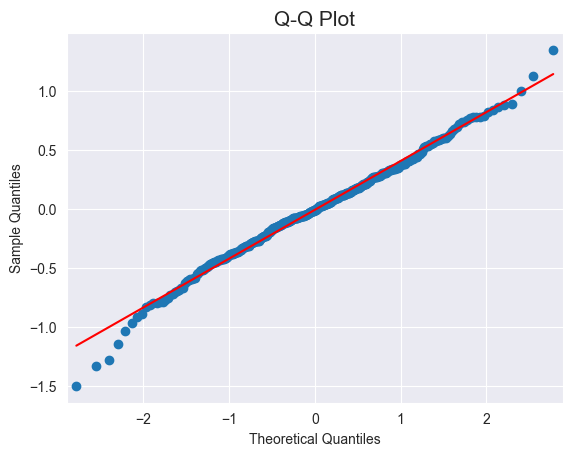

In [33]:
# Q-Q plot
# On appelle QQ-Plot normal le diagramme qui permet de comparer la distribution des données d’un lot à la distribution dite normale ou gaussienne. 

from statsmodels.graphics.gofplots import qqplot

qqplot(résiduals, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 10)
plt.ylabel('Sample Quantiles', fontsize = 10)

plt.show()

In [34]:
st.shapiro(résiduals)

ShapiroResult(statistic=0.9932709336280823, pvalue=0.10155541449785233)

vue que le p-value est supérieure au seuil habituel de 0.05, donc les résidus suivent probablement une distribution normale H0

ce qui est conforme à l'une des hypothèses clés nécessaires pour effectuer une régression linéaire 

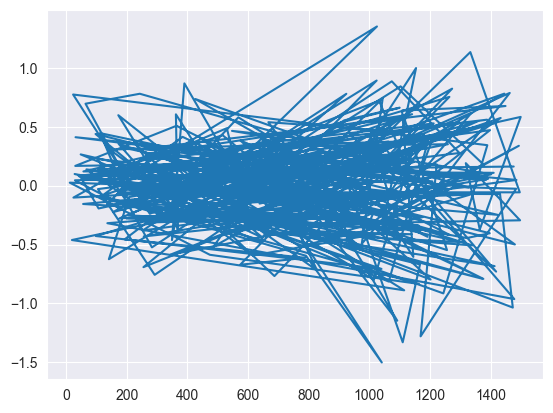

In [35]:
# Selon les hypothèses, il ne devrait y avoir aucune corrélation le long des résidus. Cela peut être vérifié avec un simple
# graphique linéaire

plt.plot(résiduals)

In [36]:
# le score de Durbin Watson
from statsmodels.stats.stattools import durbin_watson
dbw = durbin_watson(résiduals)

print(dbw)

1.9839394826182584


Un score de Durbin-Watson entre 1,5 et 2,5 est considéré comme relativement normal. 

Un score de Durbin-Watson de 2 n'aurait aucune autocorrélation.

on observe que le score de Durbin-watson et quasiment de 2 alors il n'y a aucune autocorrélation

vue que les hypothèses clés de la régression linéaire sont bonne je peux maintenant implémenté les valeurs manquantes 

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Implémentation des valeurs manquantes</span> <a class="anchor" id="section_2_3"></a>

In [37]:
from statsmodels.tools import add_constant

# Sélectionner les données où 'margin_low' est NaN
X_missing = billet[billet[target].isna()][prédictives]

# Ajoutez la constante aux données manquantes pour correspondre au modèle
X_missing_with_const = add_constant(X_missing, has_constant='add')

# Prédire les valeurs manquantes pour 'margin_low'
predicted_margin_low = model.predict(X_missing_with_const)

# Affichage des valeurs imputées
print("Valeurs imputées pour 'margin_low' :")
print(predicted_margin_low)



Valeurs imputées pour 'margin_low' :
[4.06395712 4.09107321 4.1206544  3.97274844 4.1206544  4.1379101
 4.06888731 4.1255846  4.09600341 4.08614301 4.1231195  4.19707248
 4.1305148  4.05163162 4.19953758 4.23404897 4.1083289  4.10339871
 4.06642222 4.09353831 4.1231195  4.1280497  4.15023559 4.1083289
 4.1305148  4.22911877 4.1206544  4.05902692 4.1280497  5.25282217
 5.26268257 5.29965906 5.32184495 5.20598528 5.15421819 5.16654369
 5.24542687]


In [38]:
# Calcul de la moyenne de 'margin_low' avant l'imputation
moyenne_avant_imputaion = billet_not_missing[target].mean()
print("Moyenne de 'margin_low' avant imputation :", moyenne_avant_imputaion)

# Imputation des valeurs prédites dans le DataFrame original
billet.loc[billet[target].isna(), target] = predicted_margin_low

# Calcul de la moyenne de 'margin_low' après l'imputation
moyenne_après_imputaion = billet[target].mean()
print("Moyenne de 'margin_low' après imputation :", moyenne_après_imputaion)


Moyenne de 'margin_low' avant imputation : 4.485967190704033
Moyenne de 'margin_low' après imputation : 4.4828316734249


In [39]:
#fonction pour voir si il y a des NAN sur mon Data frame 
def check_for_nan(df):

    nan_check = df.isna().any()
    
    if nan_check.any():
        print("Le DataFrame contient des valeurs NaN.")
    else:
        print("Le DataFrame ne contient pas de valeurs NaN.")

check_for_nan(billet)

Le DataFrame ne contient pas de valeurs NaN.


Maintenant que mon dataframe ne contient plus de valeurs manquantes (NaN), je vais pouvoir tester différents modèles pour déterminer lequel est le plus performant sur mes données. Ensuite, je pourrai utiliser ce modèle pour détecter les faux billets.

<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 3 - Clustering Kmeans</span> <a class="anchor" id="chapter3"></a>


L'algorithme K-means est un procédé de clustering non supervisé, segmente un jeu de données en K groupes distincts en se basant sur les attributs des observations. Il vise à minimiser la variance au sein des clusters, assurant que les éléments de chaque groupe sont plus similaires entre eux qu'avec ceux des autres groupes.

In [40]:
billet2 = billet.copy()

In [41]:
# On sépare notre jeu de données

X=billet.drop(columns='is_genuine')
y=billet.is_genuine

In [42]:
# On commence à scale nos données

scaler_kmeans=StandardScaler()

X_scaled=scaler_kmeans.fit_transform(X)
X_scaled[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.05634085, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08053128, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12555869, -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30790571, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.67125732,  1.41767746,
        -0.15875038]])

In [43]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_scaled_trainK, X_scaled_testK, y_trainK, y_testK = train_test_split(X_scaled,y,random_state=0)

In [44]:
# On va enregistrer nos données d'entrînements

Billets_train=pd.DataFrame(X_scaled_trainK, columns=['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length'])

Billets_train.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.611179,-0.198867,1.227867,-0.504516,0.338863,0.884303
1,0.627873,-1.267808,-0.799668,-1.338222,1.503983,0.643598
2,1.119526,0.034963,0.029778,-0.231667,-0.998867,0.586288
3,-0.355432,-1.501639,0.767063,-0.246825,-0.351578,1.044772
4,0.824534,-1.835683,0.367701,-0.125559,-0.653647,0.540439


<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">La Méthode du coude</span> <a class="anchor" id="section_3_1"></a>

C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

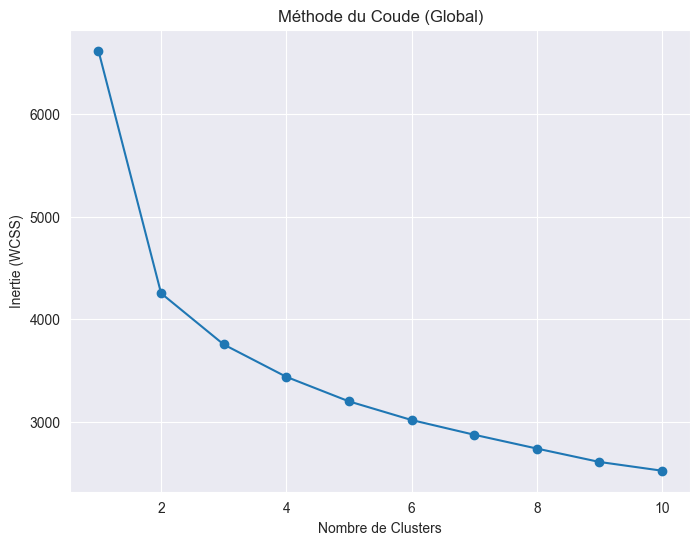

In [45]:
# Méthode du coude pour l'ensemble des données
max_clusters = 10
inertias = []

for i in range(1, max_clusters + 1):
    kmeans_global = KMeans(n_clusters=i, init='k-means++')
    kmeans_global.fit(Billets_train)
    inertias.append(kmeans_global.inertia_)

# Tracer la courbe de la méthode du coude pour l'ensemble des données
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Méthode du Coude (Global)')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (WCSS)')
plt.show()

In [46]:
# Nous allons maintenant mettre en place notre Kmeans

n_clusters= 2
mod_Kmeans=KMeans(n_clusters=n_clusters,random_state=0)

# On entrîne notre modèle

mod_Kmeans.fit(X_scaled_trainK,y_trainK)

C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [47]:
# On prédit y_pred à partir de X_scaled_test

y_predK = mod_Kmeans.predict(X_scaled_testK)

# Inversion des prédictions
y_predK = np.where(y_predK == 0, 1, 0)

y_predK

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [48]:
# On stock nos clusters dans une variable : 
labels = mod_Kmeans.labels_


Billets_train['Clusters']=labels
Billets_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,Clusters
0,1.611179,-0.198867,1.227867,-0.504516,0.338863,0.884303,0
1,0.627873,-1.267808,-0.799668,-1.338222,1.503983,0.643598,0
2,1.119526,0.034963,0.029778,-0.231667,-0.998867,0.586288,0
3,-0.355432,-1.501639,0.767063,-0.246825,-0.351578,1.044772,0
4,0.824534,-1.835683,0.367701,-0.125559,-0.653647,0.540439,0


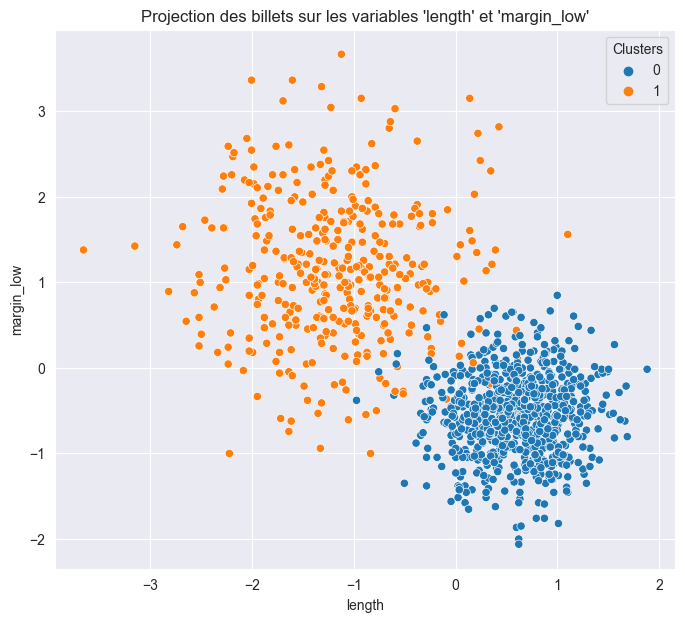

In [49]:
# Nous pouvons faire apparaître nos variables sur les quelles nous avons travaillés depuis le début il s'agit de length et margin_low

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des billets sur les variables 'length' et 'margin_low'")
x_y = [0,1]
sns.scatterplot(data=Billets_train,x = 'length',y = 'margin_low', hue = "Clusters")
ax.set_xlabel("length")
ax.set_ylabel("margin_low")
plt.show()

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Evaluation du Modèle</span> <a class="anchor" id="section_3_2"></a>

In [50]:
# Création d'une fonction de matrice de confusion 

def my_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(cf_matrix, annot=True, fmt="g", cmap="coolwarm")
    plt.show()

In [51]:
# Définissons une fonction pour calculer la matrice de confusion sous forme de Dataframe

def confusion(y_test,y_pred) :
    """Affiche la matrice de confusion"""
    
    mat = confusion_matrix(y_test,y_pred)
    mat = pd.DataFrame(mat)
    mat.index = [f"test_{i}"for i in mat.index]
    mat.columns = [f"pred_{i}"for i in mat.columns]
    
    
    return mat

matrice de confusion représente les performances d'un modèle de classification

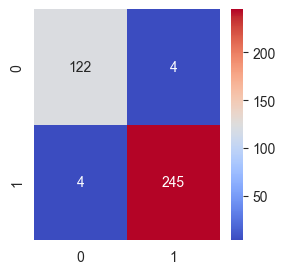

In [52]:
# Création de matrice de confusion pour Kmeans 
my_confusion_matrix(y_predK, y_testK) 

In [53]:
confusion(y_testK, y_predK)

,pred_0,pred_1
test_0,122,4
test_1,4,245


Le modèle a correctement prédit 122 cas comme vrais négatifs et 245 cas comme vrais positifs, tandis qu'il s'est trompé en identifiant 4 cas comme faux positifs et 4 autres comme faux négatifs.

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Calcul des scores</span> <a class="anchor" id="section_3_3"></a>

Il existe différentes mesures qui peuvent accompagner la matrice de confusion pour analyser les performances 

L’accuracy : il indique le pourcentage de bonnes prédictions

La precision : est également appelée Positive Predictive Value. Elle correspond au taux de prédictions correctes parmi les prédictions positives

Le recall : est également appelé sensitivity (sensibilité). Il correspond au taux d’individus positifs détectés par le modèle 

Le F1-score : est une moyenne harmonique de la précision et du recall, il n’est élevé qu’à condition que ces deux indicateurs soient élevés.

In [54]:
accuracy_kmeans=accuracy_score(y_testK,y_predK).round(4)*100
print("Accuracy :",accuracy_kmeans)


Accuracy : 97.87


In [55]:
precision_kmeans=precision_score(y_testK,y_predK).round(4)*100
print("Précision :", precision_kmeans)

Précision : 98.39


In [56]:
recall_kmeans=recall_score(y_testK,y_predK).round(4)*100
print("Recall :",recall_kmeans)

Recall : 98.39


In [57]:
f1_score_kmeans=f1_score(y_testK,y_predK).round(4)*100
print("F1_score :",f1_score_kmeans)

F1_score : 98.39


Nous avons donc ici des scores élevés concernant notre modèle avec un score moyen de 98%

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Courbe ROC</span> <a class="anchor" id="section_3_4"></a>

La courbe ROC permet de visualiser comment la spécificité et la sensibilité d’un modèle évolue en fonction de ce seuil.

In [58]:
# On définit notre courbe Roc afin de l'utiliser sur d'autre modèle 

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

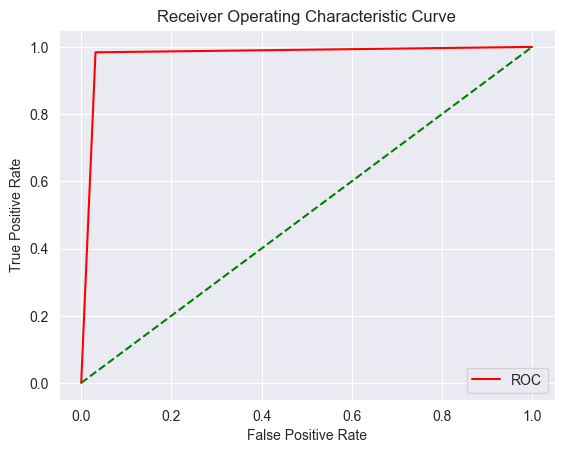

Kmeans :  ROC AUC=97.609


In [59]:
fper, tper, thresholds = roc_curve(y_testK,y_predK)
plot_roc_curve(fper, tper)
K_auc = roc_auc_score(y_testK, y_predK)*100
print("Kmeans :  ROC AUC=%.3f"%(K_auc))

In [60]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_testK,y_predK)
K_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Kmeans est de :",K_auc)

L'AUC ROC de notre Kmeans est de : 97.61


L'estimation semble bon, il serait intéressant de comparer notre modèle avec d'autres méthodes

<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 4 - Régression Logisitque</span> <a class="anchor" id="chapter4"></a>

La régression logistique est une technique de classification statistique qui explore les liens entre plusieurs variables qualitatives X et une variable de réponse qualitative Y. Ce modèle s'appuie sur les principes des modèles linéaires généralisés, adoptant la fonction logistique comme fonction de lien.

En outre, ce modèle est capable de prédire la probabilité d'un événement, avec des coefficients de régression ajustés de manière optimale. Les probabilités prédites par un modèle de régression logistique se situent toujours dans l'intervalle [0, 1]

In [61]:
X_log=billet2.drop(columns=['is_genuine'])
y_log=billet2.is_genuine

In [62]:
# on stardadise nos données X 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05634085, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08053128, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12555869, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.55701205,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04163002,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.22308209,  0.94299904,
        -0.69747008]])

In [63]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled,y_log,random_state=0)

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">GridsearchCv</span> <a class="anchor" id="section_4_1"></a>

 Grid search consiste à optimiser les hyperparamètres sur nos données en entraînant successivement plusieurs modèles et à comparer leurs résultats.

In [64]:
# Définir l'estimateur et la grille de paramètres
estimateur = LogisticRegression()
score = 'accuracy'
param_grid = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'penalty' : ['l1', 'l2', 'elasticnet', None],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Réaliser une recherche sur grille
grid = GridSearchCV(estimateur, param_grid, cv=5, scoring=score, verbose=0)
grid.fit(X_train_log, y_train_log)

C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TOTO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\TOTO\AppData\Roaming\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [65]:
# On regarde quelle a été le meilleur score obtenu en croisant les différents paramètres
grid.best_score_
print("Le meilleur score obtenu avec les données d'entrainement est de :", round(grid.best_score_*100,4),"%")

Le meilleur score obtenu avec les données d'entrainement est de : 99.0222 %


In [66]:
# On fait apparaitre les meilleurs paramètres qui ont donnés le score au dessus
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

La configuration 'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear' définit un modèle de régression logistique avec une forte régularisation Lasso, ce qui entraîne une simplification du modèle en réduisant certains coefficients à zéro. 

L'algorithme liblinear est utilisé pour l'optimisation, particulièrement adapté pour des datasets de petite ou moyenne taille et la régularisation l1

In [67]:
# On enregistre les paramètres dans une variable model. Cela nous permettra de réutiliser ses paramètres pour tester nos données Test
modelRegLog = grid.best_estimator_

In [68]:
# On enregistre les prédictions dans une variable y_pred
y_pred_log = modelRegLog.predict(X_test_log)

# On vérifie le score de notre model sur les données Test (F1 score)
f1_reglog = f1_score(y_test_log, y_pred_log)
f1_reglog = round(f1_reglog*100,4)
print("Le score de notre modèle sur les données Test est de :", f1_reglog,"%")

Le score de notre modèle sur les données Test est de : 99.7996 %


Nous pouvons voir que nous avons un modèle qui atteint les 99.8% de vérification 

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Evaluation du Modèle</span> <a class="anchor" id="section_4_2"></a>

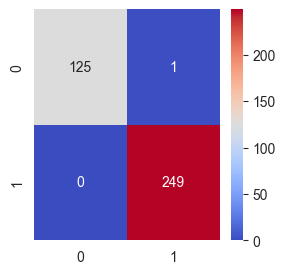

In [69]:
my_confusion_matrix(y_test_log,y_pred_log)

Nous pouvons voir que le modèle à une performance plus intéressante que le Kmeans

In [70]:
confusion(y_test_log,y_pred_log)

,pred_0,pred_1
test_0,125,1
test_1,0,249


In [71]:
y_prob = grid.predict_proba(X_test_log).round(2)
y_prob

array([[0.07, 0.93],
       [0.01, 0.99],
       [0.88, 0.12],
       [0.3 , 0.7 ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.13, 0.87],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.1 , 0.9 ],
       [0.07, 0.93],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.02, 0.98],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.1 , 0.9 ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.41, 0.59],
       [0.  ,

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Calcul des scores</span> <a class="anchor" id="section_4_3"></a>

In [72]:
accuracy_Reglog=accuracy_score(y_test_log,y_pred_log).round(4)*100
print("Accuracy :",accuracy_Reglog)

Accuracy : 99.72999999999999


In [73]:
precision_Reglog=precision_score(y_test_log,y_pred_log).round(4)*100
print("Précision :", precision_Reglog)

Précision : 99.6


In [74]:
recall_Reglog=recall_score(y_test_log,y_pred_log).round(4)*100
print("Recall :",recall_Reglog)

Recall : 100.0


In [75]:
f1_score_Reglog=f1_score(y_test_log,y_pred_log).round(5)*100
print("F1_score :",f1_score_Reglog)

F1_score : 99.8


<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Courbe ROC</span> <a class="anchor" id="section_4_4"></a>

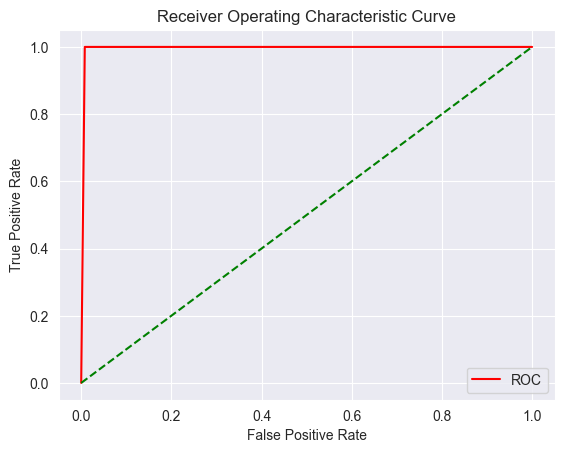

Reg_Log:  ROC AUC=99.603


In [76]:
fper, tper, thresholds = roc_curve(y_test_log,y_pred_log)
plot_roc_curve(fper, tper)
RegL_auc = roc_auc_score(y_test_log,y_pred_log)*100
print("Reg_Log:  ROC AUC=%.3f"%(RegL_auc))

In [77]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_log,y_pred_log)
RegLog_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Regression Logistique est de :",RegLog_auc)

L'AUC ROC de notre Regression Logistique est de : 99.6


<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 5 - KNN </span> <a class="anchor" id="chapter5"></a>

Le modèle k-NN (k-Nearest Neighbors) est un algorithme de classification supervisé utilisé pour prédire l'étiquette de classe d'un nouvel exemple en fonction de ses k voisins les plus proches dans un ensemble de données d'entraînement.

In [78]:
#Nous pouvons repartir du modèle optimisé que nous avons mis en place avec la régression Logistique 

X_knn=billet2.drop(columns=['is_genuine'])
y_knn=billet2.is_genuine

In [79]:
# On standardise nos données X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_knn)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05634085, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08053128, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12555869, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.55701205,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04163002,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.22308209,  0.94299904,
        -0.69747008]])

In [80]:
#Séparons nos données en un groupe d'entrainement et un groupe de test. 
 
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled,y_knn,random_state=0)

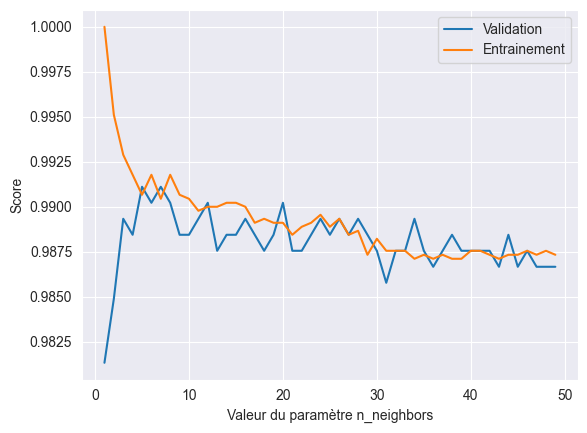

In [81]:
KNN = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(KNN , X_train_knn ,y_train_knn, param_name='n_neighbors', param_range=k, cv = 5)

plt.plot(k,val_score.mean(axis = 1), label= 'Validation')
plt.plot(k,train_score.mean(axis = 1), label = 'Entrainement')

plt.ylabel('Score')
plt.xlabel('Valeur du paramètre n_neighbors')
plt.legend()

 Le modèle semble bien généraliser car les scores de validation et d'entraînement sont proches l'un de l'autre pour un nombre élevé de voisins, ce qui suggère qu'il n'y a pas de surajustement (overfitting) significatif

In [82]:
cross_val_score(KNeighborsClassifier(6),X_train_knn,y_train_knn, cv=5).mean()

0.9902222222222223

 le modèle a correctement prédit environ 99.02% des instances lors de la validation croisée

on va essayer d'optimiser notre modèle avec GridsearchCV

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">GridsearchCv</span> <a class="anchor" id="section_5_1"></a>

In [83]:
# On définit les paramètres à tester
param_grid={'n_neighbors': np.arange(1,30),'metric':['euclidean','manhattan']}

# On ajoute notre GridSearchCV a une variable
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy')

In [84]:
grid.fit(X_train_knn,y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

In [85]:
print("Meilleurs paramètres :",grid .best_params_)
print("Meilleur score (accuracy):",round(grid .best_score_*100))

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 4}
Meilleur score (accuracy): 99


In [86]:
model_knn=grid.best_estimator_

In [87]:
model_knn.score(X_test_knn,y_test_knn)*100

99.2

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Evaluation du Modèle</span> <a class="anchor" id="section_5_2"></a>

In [88]:
# On enregistre les prédictions dans une variable y_pred
y_pred_knn = model_knn.predict(X_test_knn)

# On vérifie le score de notre model sur les données Test (F1 score)
score_f1 = f1_score(y_test_knn, y_pred_knn)
score_f1 = round(score_f1*100,4)
print("Le score de notre model sur les données Test est de :", score_f1,"%")

Le score de notre model sur les données Test est de : 99.3964 %


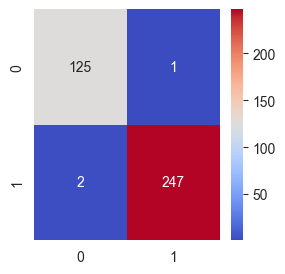

In [89]:
my_confusion_matrix(y_test_knn,y_pred_knn)

Nous pouvons voir que le modèle à une performance plus intéressante que le Kmeans mais moins que la  Régression Logistique 

In [90]:
confusion(y_test_knn,y_pred_knn)

,pred_0,pred_1
test_0,125,1
test_1,2,247


In [91]:
 # On peut déterminer la probalbilité d'un d'être vrai ou faux 
    
y_prob = grid.predict_proba(X_test_knn).round(2)*100
y_prob

array([[  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [ 25.,  75.],
       [100.,   0.],
       [100.,   0.],
       [ 25.,  75.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [100.,   0.],
       [100.,   0.],
       [100.,   0.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0., 100.],
       [  0.,

<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Calcul des scores</span> <a class="anchor" id="section_5_3"></a>

In [92]:
accuracy_kNN=accuracy_score(y_test_knn,y_pred_knn).round(4)*100
print("Accuracy :",accuracy_kNN)

Accuracy : 99.2


In [93]:
precision_kNN=precision_score(y_test_knn,y_pred_knn).round(4)*100
print("Précision :", precision_kNN)

Précision : 99.6


In [94]:
recall_kNN=recall_score(y_test_knn,y_pred_knn).round(4)*100
print("Recall :",recall_kNN)

Recall : 99.2


In [95]:
f1_score_kNN=f1_score(y_test_knn,y_pred_knn).round(4)*100
print("F1_score :",f1_score_kNN)

F1_score : 99.4


<style>
    .section-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250); 
        display: inline-block; 
        box-sizing: border-box; 
    }
</style>

## <span class="section-heading">Courbe ROC</span> <a class="anchor" id="section_5_4"></a>

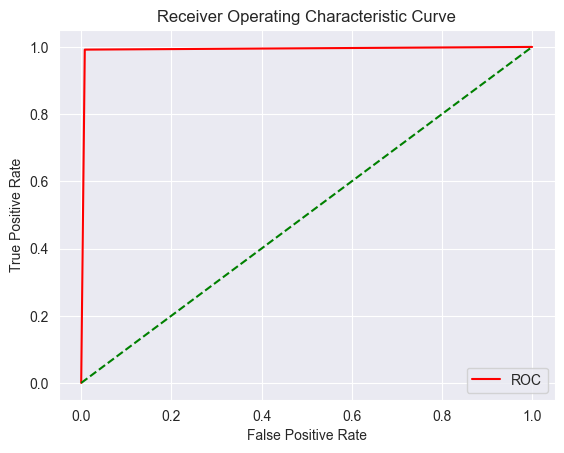

Knn :  ROC AUC=99.202


In [96]:
fper, tper, thresholds = roc_curve(y_test_knn,y_pred_knn)
plot_roc_curve(fper, tper)
Knn_auc = roc_auc_score(y_test_knn, y_pred_knn)*100
print("Knn :  ROC AUC=%.3f"%(Knn_auc))

In [97]:
# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC va mesurer la performance globale de notre modèle, il correspond à l'air sous la courbe 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_knn,y_pred_knn)
Knn_auc=auc(fper, tper).round(4)*100
print("L'AUC ROC de notre Knn est de :",Knn_auc)

L'AUC ROC de notre Knn est de : 99.2


<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 6 - Comparaison des modèles</span> <a class="anchor" id="chapter6"></a>

In [98]:
cols=['Kmeans','Régression Logistique','KNN']

index=['Accuracy','Precison','Recall','F1_Score','Auc_Roc']

Perf_modèle=pd.DataFrame(index=index,columns=cols)

Perf_modèle['Kmeans']=[accuracy_kmeans,precision_kmeans,recall_kmeans,f1_score_kmeans,K_auc]
Perf_modèle['Régression Logistique']=[accuracy_Reglog,precision_Reglog,recall_Reglog,f1_score_Reglog,RegLog_auc]
Perf_modèle['KNN']=[accuracy_kNN,precision_kNN,recall_kNN,f1_score_kNN,Knn_auc]


Perf_modèle

,Kmeans,Régression Logistique,KNN
Accuracy,97.87,99.73,99.2
Precison,98.39,99.60,99.6
Recall,98.39,100.00,99.2
F1_Score,98.39,99.80,99.4
Auc_Roc,97.61,99.60,99.2


Selon nos divers indicateurs et l'analyse des matrices de confusion, le modèle qui présente les meilleures performances s'avère être la Régression Logistique.

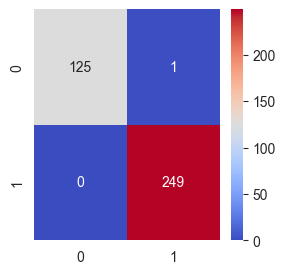

In [99]:
my_confusion_matrix(y_test_log,y_pred_log)

La matrice de confusion révèle une excellente précision du modèle, avec un nombre négligeable de faux positifs (1) et aucun faux négatif (0), soulignant sa forte capacité à classer correctement les observations

<style>
    .chapter-heading {
        background-color: transparent; 
        padding: 0; 
        color: #fff; 
        margin: 0; 
        text-align: center; 
        border: 1px solid RGB(0,150,250);
        display: inline-block;
        box-sizing: border-box; 
    }
</style>

## <span class="chapter-heading">Chapitre 7 - Modèle Finale</span> <a class="anchor" id="chapter7"></a>

1 - Choix des variables du df à standardiser

2 - Standardisation

3 - Calcul prédiction grâce à la regression logistique modelRegLog sur les dimensions : diagonal,height_left,height_right,margin_low,margin_up,length

4 - Mise en forme et création de deux nouvelles variabiles Prédiction et Probabilité 

In [100]:
# importation du CSV billets production 

Billet_prod=pd.read_csv(chemin +'billets_production.csv',sep=',',decimal='.')
Billet_prod


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [101]:
# Nous allons définir notre Fonction

def Prediction_Billet(Df):
    X=Df[['diagonal','height_left','height_right','margin_low','margin_up','length']] # création du dataframe
    X_fit=scaler.fit_transform(X) # On entraîne et transforme nos données
    
    prediction_X=modelRegLog.predict(X_fit) # création de la variable de prediction
    probabilité_X=modelRegLog.predict_proba(X_fit)[:,1]*100 # création de la variable de probabilité
    
    Df['Prédiction']=prediction_X # ajout de la variable predict au dataframe
    Df['Prédiction']=Df['Prédiction'].replace([1,0],[True,False]) # On remet True et False en sortie
    
    Df['Probabilité']=probabilité_X # ajout de la variable proba au dataframe
   

    Df=Df.reindex(columns=['id','diagonal','height_left','height_right','margin_low','margin_up','length','Prédiction','Probabilité'])
    # On réindexe nos colonnes pour une meilleur lisibilité 
    return Df

In [102]:
Prediction_Billet(Billet_prod)

,id,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction,Probabilité
0,A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,6.796594
1,A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,4.222933
2,A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,3.301288
3,A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,99.794563
4,A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,99.981502


In [103]:
Billet_live=pd.read_csv(chemin +'billets_test live.csv',sep=',',decimal='.')
Billet_live

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [104]:
Prediction_Billet(Billet_live)

,id,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction,Probabilité
0,B_1,172.09,103.95,103.73,4.39,3.09,113.19,True,99.866063
1,B_2,171.52,104.17,104.03,5.27,3.16,111.82,False,15.846077
2,B_3,171.78,103.80,103.75,3.81,3.24,113.39,True,99.935698
3,B_4,172.02,104.08,103.99,5.57,3.30,111.10,False,0.206536
4,B_5,171.79,104.34,104.37,5.00,3.07,111.87,False,38.957039
